In [1]:
# %matplotlib inline
# !pip install --upgrade --user seaborn matplotlib

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif

In [3]:
# Load data
flood_training_data = pd.read_csv("Sierra_Leone-Weather_Data.csv")

In [4]:
print(flood_training_data.head())

          dt                         dt_iso  timezone     city_name       lat  \
0  283996800  1979-01-01 00:00:00 +0000 UTC         0  Sierra Leone  8.460555   
1  284000400  1979-01-01 01:00:00 +0000 UTC         0  Sierra Leone  8.460555   
2  284004000  1979-01-01 02:00:00 +0000 UTC         0  Sierra Leone  8.460555   
3  284007600  1979-01-01 03:00:00 +0000 UTC         0  Sierra Leone  8.460555   
4  284011200  1979-01-01 04:00:00 +0000 UTC         0  Sierra Leone  8.460555   

         lon    temp  visibility  dew_point  feels_like  ...  wind_gust  \
0 -11.779889  296.36         NaN     296.19      297.32  ...        NaN   
1 -11.779889  296.14         NaN     296.14      297.11  ...        NaN   
2 -11.779889  296.21         NaN     296.21      297.18  ...        NaN   
3 -11.779889  296.06         NaN     295.73      296.97  ...        NaN   
4 -11.779889  296.19         NaN     295.86      297.11  ...        NaN   

   rain_1h  rain_3h  snow_1h  snow_3h  clouds_all  weather_id 

In [5]:
# Data Preprocessing

# Handling Missing Values
flood_training_data["rain_1h"] = flood_training_data['rain_1h'].fillna(0)
flood_training_data["rain_3h"] = flood_training_data['rain_3h'].fillna(0)

In [6]:
rainfall = 'rain_1h'
rainfall_data = flood_training_data[rainfall]
print(rainfall_data.head(20))

0     0.00
1     0.00
2     0.00
3     0.00
4     0.00
5     0.00
6     0.00
7     0.00
8     0.00
9     0.00
10    0.00
11    0.00
12    0.00
13    0.00
14    0.00
15    0.00
16    0.00
17    0.18
18    0.00
19    0.00
Name: rain_1h, dtype: float64


In [7]:
# Create a new feature 'rain' by combining 'rain_1h' and 'rain_3h'
flood_training_data["rain"] = flood_training_data["rain_1h"] + flood_training_data["rain_3h"]

In [8]:
index_value = 5893
column_values = flood_training_data.loc[index_value, 'rain']
print(column_values)

5.45


In [9]:
# Create binary target variable
# Set a rainfall threshold to be considered flood or not
threshold = 4.0  
flood_training_data['flood_occurred'] = np.where(flood_training_data['rain'] >= threshold, 1, 0)

In [10]:
print(flood_training_data['flood_occurred'][5892])

1


In [11]:
print(flood_training_data.isnull().sum())

dt                          0
dt_iso                      0
timezone                    0
city_name                   0
lat                         0
lon                         0
temp                        0
visibility             393633
dew_point                   0
feels_like                  0
temp_min                    0
temp_max                    0
pressure                    0
sea_level              393773
grnd_level             393773
humidity                    0
wind_speed                  0
wind_deg                    0
wind_gust              393126
rain_1h                     0
rain_3h                     0
snow_1h                393773
snow_3h                393773
clouds_all                  0
weather_id                  0
weather_main                0
weather_description         0
weather_icon                0
rain                        0
flood_occurred              0
dtype: int64


In [12]:
flood_training_data["wind_gust"] = flood_training_data['wind_gust'].fillna(0)
flood_training_data["visibility"].fillna(flood_training_data["visibility"].median(), inplace=True)

In [13]:
print(flood_training_data['visibility'].isnull())

0         False
1         False
2         False
3         False
4         False
          ...  
393768    False
393769    False
393770    False
393771    False
393772    False
Name: visibility, Length: 393773, dtype: bool


In [14]:
print(flood_training_data['visibility'].head())

0    10000.0
1    10000.0
2    10000.0
3    10000.0
4    10000.0
Name: visibility, dtype: float64


In [15]:
print(flood_training_data.isnull().sum())

dt                          0
dt_iso                      0
timezone                    0
city_name                   0
lat                         0
lon                         0
temp                        0
visibility                  0
dew_point                   0
feels_like                  0
temp_min                    0
temp_max                    0
pressure                    0
sea_level              393773
grnd_level             393773
humidity                    0
wind_speed                  0
wind_deg                    0
wind_gust                   0
rain_1h                     0
rain_3h                     0
snow_1h                393773
snow_3h                393773
clouds_all                  0
weather_id                  0
weather_main                0
weather_description         0
weather_icon                0
rain                        0
flood_occurred              0
dtype: int64


In [16]:
# Feature Engineering
features = ['dt', 'timezone', 'lat', 'lon', 'temp', 'visibility', 'dew_point', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity',
            'wind_speed', 'wind_gust', 'rain', 'clouds_all']

X = flood_training_data[features]
y = flood_training_data['flood_occurred']  

In [17]:
X.head()

,dt,timezone,lat,lon,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_gust,rain,clouds_all
0,283996800,0,8.460555,-11.779889,296.36,10000.0,296.19,297.32,295.84,297.01,1011,99,1.68,0.0,0.0,48
1,284000400,0,8.460555,-11.779889,296.14,10000.0,296.14,297.11,295.51,296.91,1011,100,1.32,0.0,0.0,64
2,284004000,0,8.460555,-11.779889,296.21,10000.0,296.21,297.18,295.63,296.93,1010,100,1.34,0.0,0.0,100
3,284007600,0,8.460555,-11.779889,296.06,10000.0,295.73,296.97,295.59,296.56,1010,98,1.26,0.0,0.0,100
4,284011200,0,8.460555,-11.779889,296.19,10000.0,295.86,297.11,295.71,296.70,1010,98,1.14,0.0,0.0,100


In [18]:
# Time Series Transformation
# Convert the 'dt' column to datetime
X['dt'] = pd.to_datetime(flood_training_data['dt'])
X = X.set_index('dt')

C:\Users\Steven\AppData\Local\Temp\ipykernel_13560\2630641247.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['dt'] = pd.to_datetime(flood_training_data['dt'])


In [19]:
# One-hot encode 'timezone' column
X_encoded = pd.get_dummies(X, columns=['timezone'])

In [20]:
from sklearn.preprocessing import LabelEncoder

# Encoding Categorical Variables
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [21]:
# Exploratory Data Analysis (EDA)

# Descriptive Statistics
print("Descriptive Statistics:\n", X.describe())

Descriptive Statistics:
        timezone           lat           lon           temp     visibility  \
count  393773.0  3.937730e+05  3.937730e+05  393773.000000  393773.000000   
mean        0.0  8.460555e+00 -1.177989e+01     298.898037    9999.577168   
std         0.0  8.413547e-11  4.315487e-11       3.404903      51.863568   
min         0.0  8.460555e+00 -1.177989e+01     288.420000     500.000000   
25%         0.0  8.460555e+00 -1.177989e+01     296.290000   10000.000000   
50%         0.0  8.460555e+00 -1.177989e+01     297.960000   10000.000000   
75%         0.0  8.460555e+00 -1.177989e+01     300.970000   10000.000000   
max         0.0  8.460555e+00 -1.177989e+01     313.670000   10000.000000   

           dew_point     feels_like       temp_min       temp_max  \
count  393773.000000  393773.000000  393773.000000  393773.000000   
mean      295.403268     300.470367     298.371291     299.467600   
std         2.303597       4.451968       3.361537       3.449333   
min  

In [22]:
#flood_training_data.columns = flood_training_data.columns.str.strip()

In [23]:
X.head()

,timezone,lat,lon,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_gust,rain,clouds_all
dt,,,,,,,,,,,,,,,
1970-01-01 00:00:00.283996800,0,8.460555,-11.779889,296.36,10000.0,296.19,297.32,295.84,297.01,1011,99,1.68,0.0,0.0,48
1970-01-01 00:00:00.284000400,0,8.460555,-11.779889,296.14,10000.0,296.14,297.11,295.51,296.91,1011,100,1.32,0.0,0.0,64
1970-01-01 00:00:00.284004000,0,8.460555,-11.779889,296.21,10000.0,296.21,297.18,295.63,296.93,1010,100,1.34,0.0,0.0,100
1970-01-01 00:00:00.284007600,0,8.460555,-11.779889,296.06,10000.0,295.73,296.97,295.59,296.56,1010,98,1.26,0.0,0.0,100
1970-01-01 00:00:00.284011200,0,8.460555,-11.779889,296.19,10000.0,295.86,297.11,295.71,296.70,1010,98,1.14,0.0,0.0,100


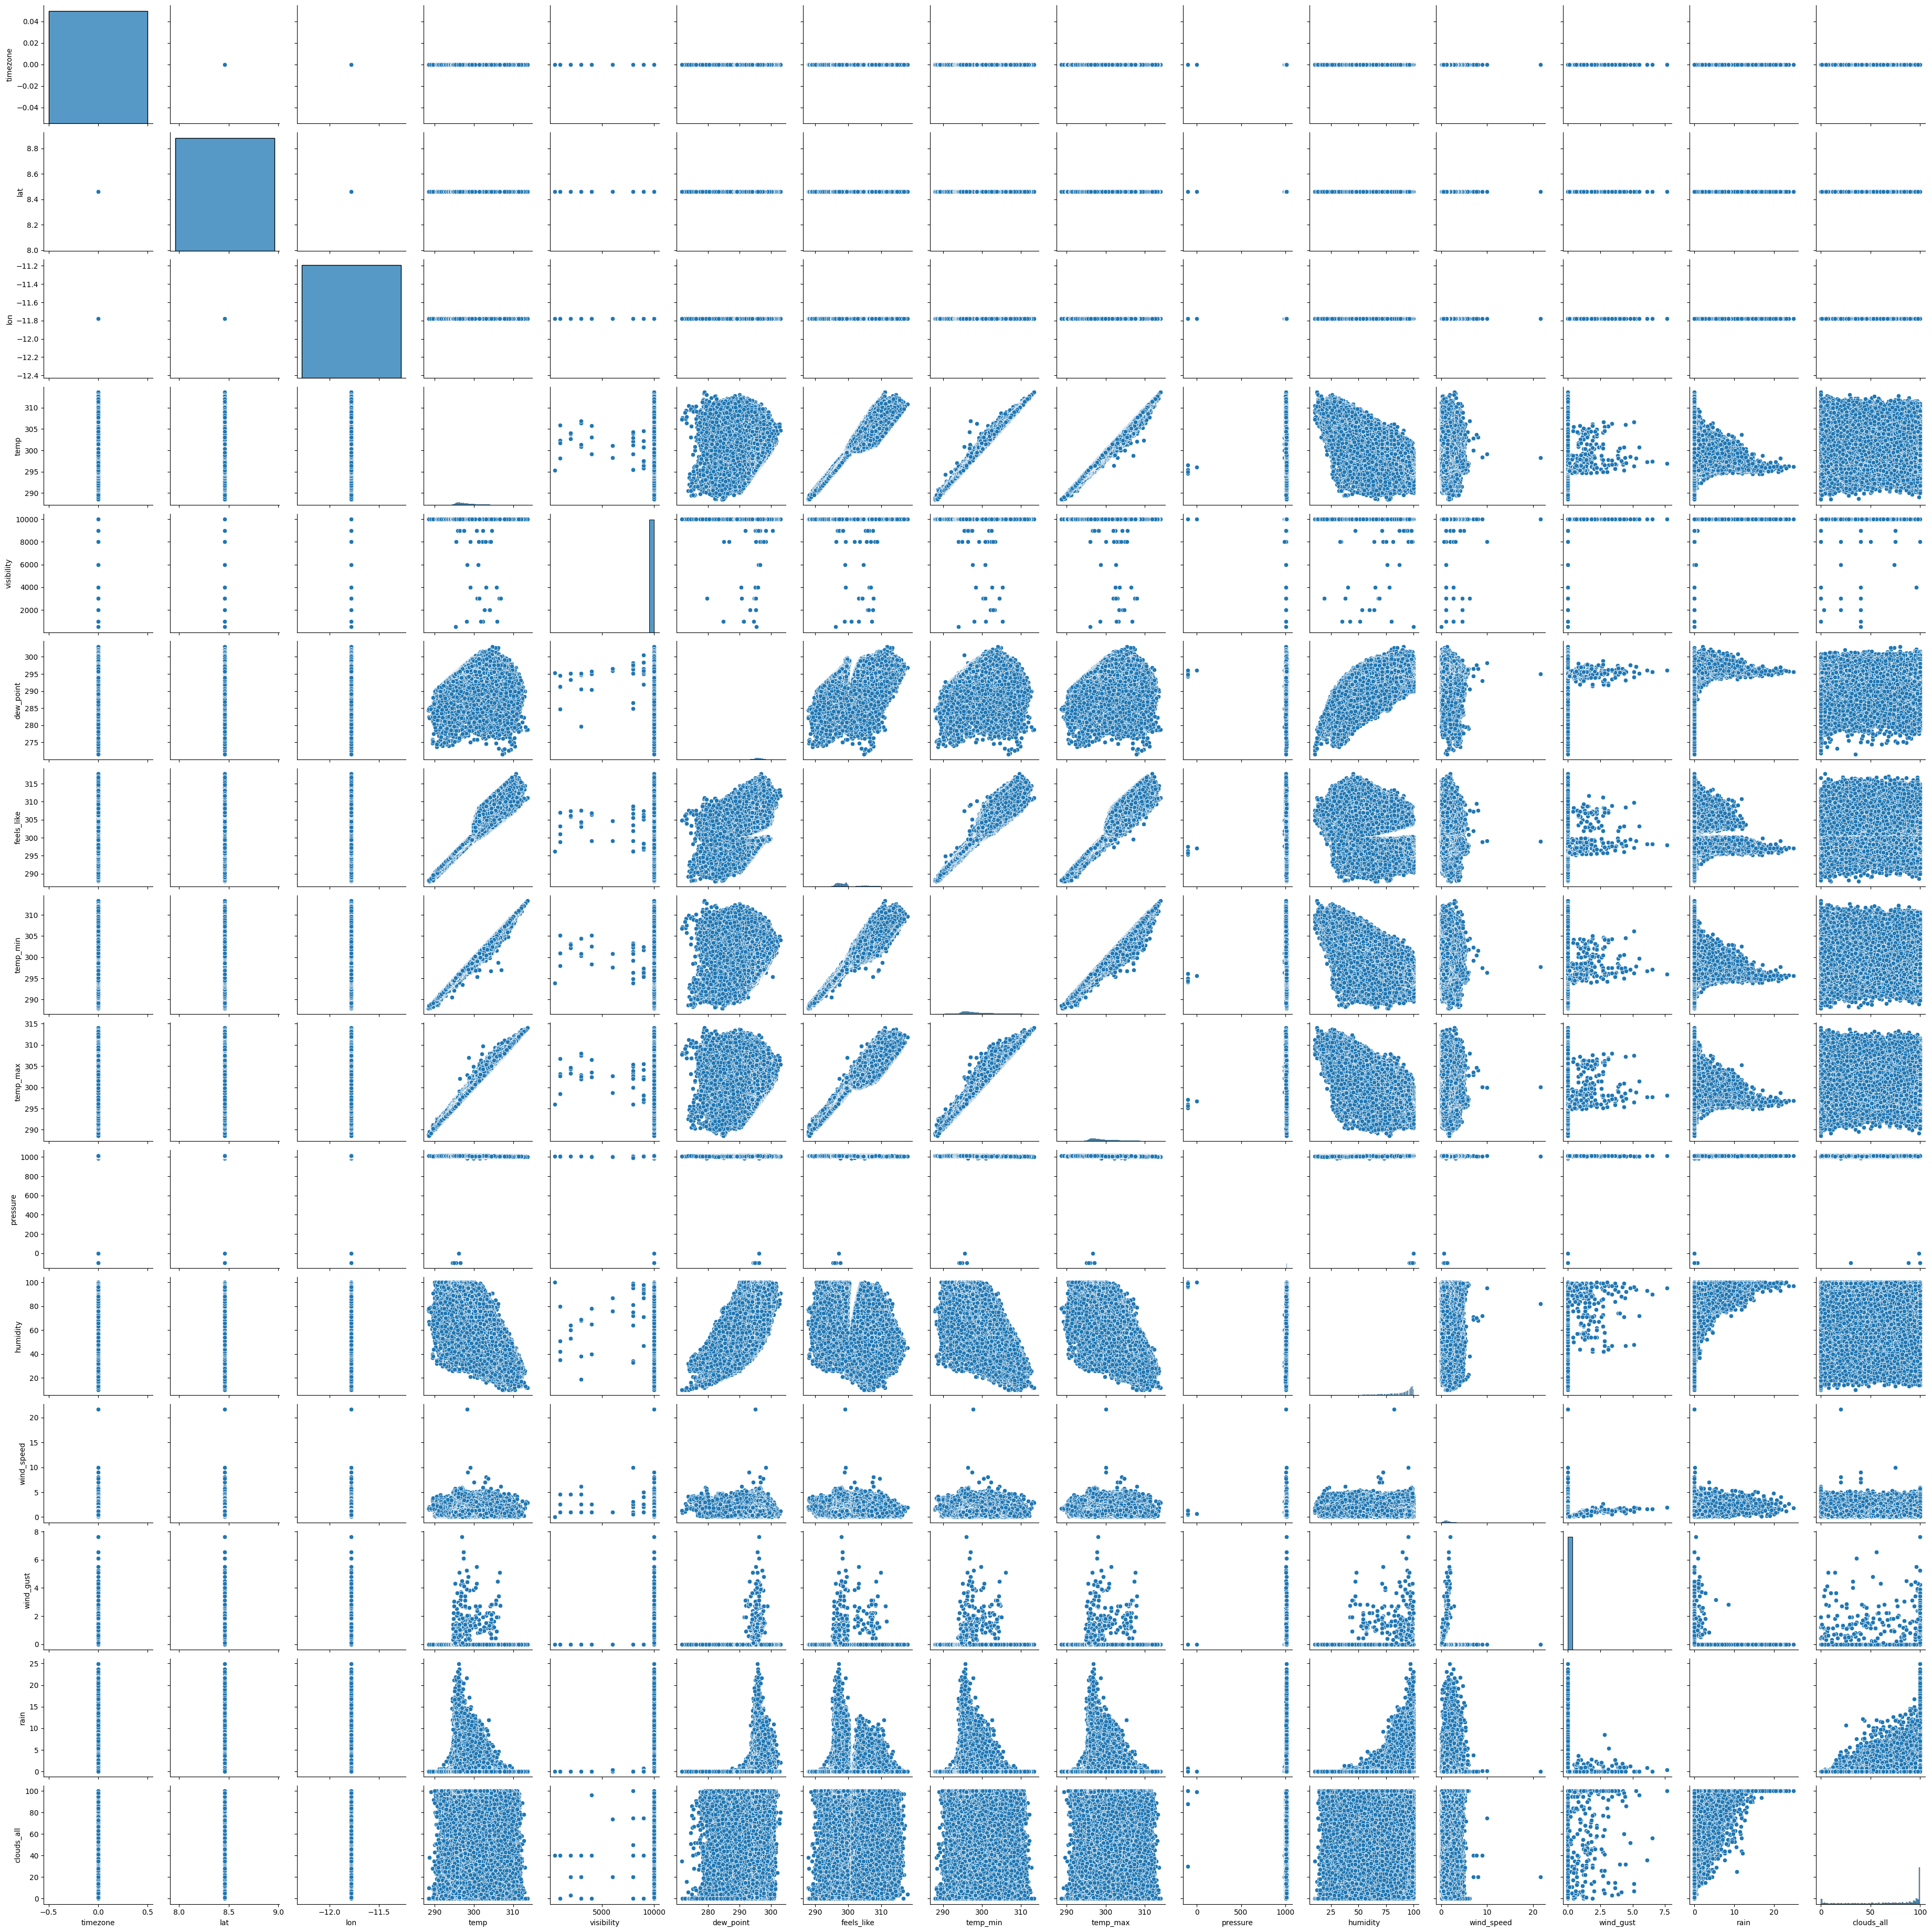

In [24]:
# Visualization
sns.pairplot(X)
plt.show()

In [25]:
flood_training_data.head()

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon,rain,flood_occurred
0,283996800,1979-01-01 00:00:00 +0000 UTC,0,Sierra Leone,8.460555,-11.779889,296.36,10000.0,296.19,297.32,...,0.0,NaN,NaN,48,802,Clouds,scattered clouds,03n,0.0,0
1,284000400,1979-01-01 01:00:00 +0000 UTC,0,Sierra Leone,8.460555,-11.779889,296.14,10000.0,296.14,297.11,...,0.0,NaN,NaN,64,803,Clouds,broken clouds,04n,0.0,0
2,284004000,1979-01-01 02:00:00 +0000 UTC,0,Sierra Leone,8.460555,-11.779889,296.21,10000.0,296.21,297.18,...,0.0,NaN,NaN,100,804,Clouds,overcast clouds,04n,0.0,0
3,284007600,1979-01-01 03:00:00 +0000 UTC,0,Sierra Leone,8.460555,-11.779889,296.06,10000.0,295.73,296.97,...,0.0,NaN,NaN,100,804,Clouds,overcast clouds,04n,0.0,0
4,284011200,1979-01-01 04:00:00 +0000 UTC,0,Sierra Leone,8.460555,-11.779889,296.19,10000.0,295.86,297.11,...,0.0,NaN,NaN,100,804,Clouds,overcast clouds,04n,0.0,0


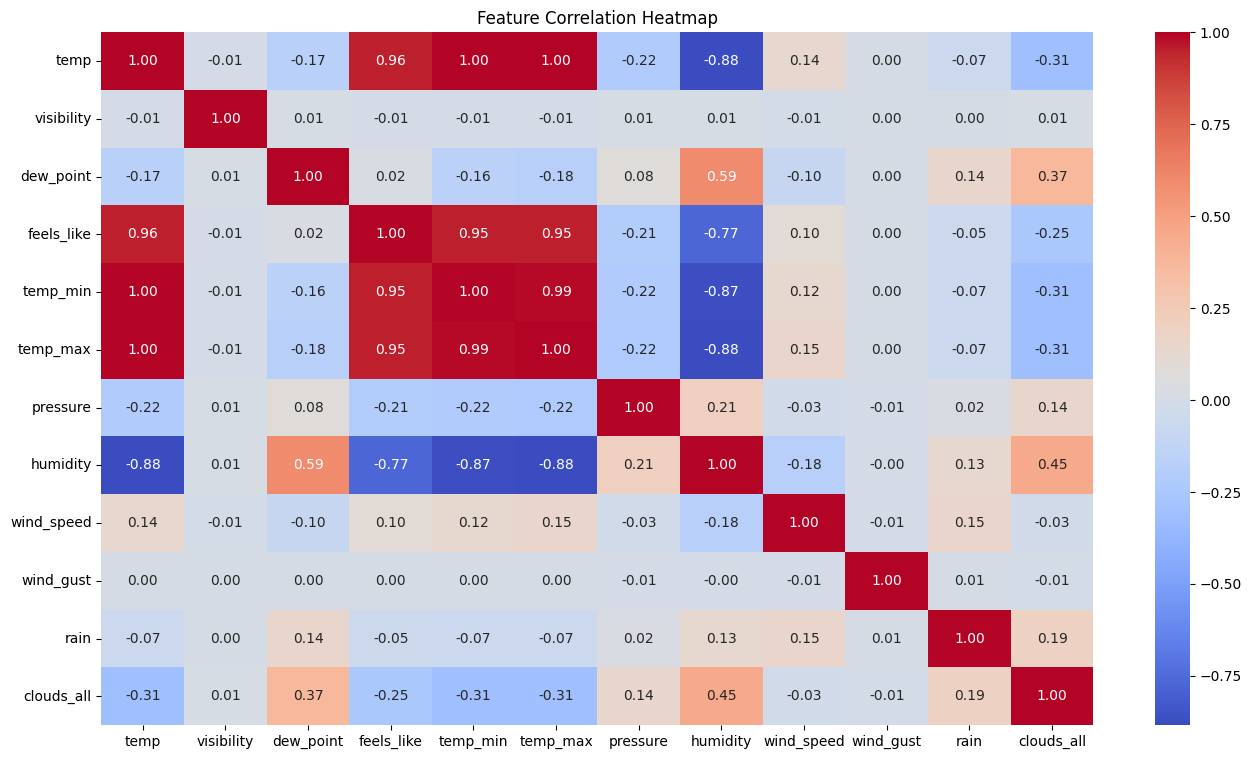

In [26]:
# Correlation Heatmap

# Select only numeric columns excluding 'lon' and 'lat'
numeric_columns = X_encoded.drop(['lon', 'lat'], axis=1).select_dtypes(include=['float64', 'int64'])


# Calculate correlation matrix
corr_matrix = numeric_columns.corr()

plt.figure(figsize=(16,9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [27]:
y = pd.Series(y)
print(y.isnull().sum())

0


In [28]:
y = y.squeeze()

In [29]:
# Model Selection

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
print(X.head())

                               timezone       lat        lon    temp  \
dt                                                                     
1970-01-01 00:00:00.283996800         0  8.460555 -11.779889  296.36   
1970-01-01 00:00:00.284000400         0  8.460555 -11.779889  296.14   
1970-01-01 00:00:00.284004000         0  8.460555 -11.779889  296.21   
1970-01-01 00:00:00.284007600         0  8.460555 -11.779889  296.06   
1970-01-01 00:00:00.284011200         0  8.460555 -11.779889  296.19   

                               visibility  dew_point  feels_like  temp_min  \
dt                                                                           
1970-01-01 00:00:00.283996800     10000.0     296.19      297.32    295.84   
1970-01-01 00:00:00.284000400     10000.0     296.14      297.11    295.51   
1970-01-01 00:00:00.284004000     10000.0     296.21      297.18    295.63   
1970-01-01 00:00:00.284007600     10000.0     295.73      296.97    295.59   
1970-01-01 00:00:00.2840112

In [31]:
print(y.head())

0    0
1    0
2    0
3    0
4    0
dtype: int64


In [32]:
#pip install xgboost

In [33]:
# Select models
models = {
#     'RandomForest': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=1500),
#     'KNeighbors': KNeighborsClassifier(),
#     'SVC': SVC(),
#     'DecisionTree': DecisionTreeClassifier(),
#     'GradientBoosting': GradientBoostingClassifier(),
    'NeuralNetwork': MLPClassifier(),
#     'XGBoost': XGBClassifier()
}

In [34]:
# Cross-validation
from sklearn.model_selection import StratifiedKFold

# Drop non-numeric columns
X_numeric = X.select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

for name, model in models.items():
    # StratifiedKFold for cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='accuracy')
    print(f"{name} Cross-Validation Accuracy: {np.mean(scores):.4f} (std: {np.std(scores):.4f})")

LogisticRegression Cross-Validation Accuracy: 0.9999 (std: 0.0000)
NeuralNetwork Cross-Validation Accuracy: 0.9996 (std: 0.0002)


In [35]:
#pip install imbalanced-learn

In [36]:
#!pip install --upgrade imbalanced-learn scikit-learn

In [41]:
# Perform oversampling using SMOTE to handle imbalance
from imblearn.over_sampling import SMOTE, RandomOverSampler

smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)

# Perform oversampling using RandomOverSampler
resampler = RandomOverSampler(random_state=42)
X_resampled_random, y_resampled_random = resampler.fit_resample(X_train, y_train)

# Choose one of the resampled datasets 
X_resampled = X_resampled_smote 
y_train_resampled = y_resampled_smote  

X_resampled = X_resampled_smote  
y_train_resampled = y_resampled_smote

# Feature Engineering and Regularization

# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_search.fit(X_resampled, y_train_resampled)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the model with the best hyperparameters
best_logistic_regression_model = grid_search.best_estimator_
best_accuracy = best_logistic_regression_model.score(X_test, y_test)

print("Accuracy with best hyperparameters:", best_accuracy)

Best hyperparameters: {'C': 100}
Accuracy with best hyperparameters: 0.9999365119674941


In [42]:
# from sklearn.metrics import classification_report, roc_auc_score
#
# y_pred = best_logistic_regression_model.predict(X_test)
# print("Classification Report:\n", classification_report(y_test, y_pred))
# print("AUC-ROC Score:", roc_auc_score(y_test, best_logistic_regression_model.predict_proba(X_test)[:, 1]))

In [44]:
for model_name, model in models.items():
    # Train the model
    model.fit(X_resampled_smote, y_resampled_smote)
    
    # Make predictions
    predictions = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions, zero_division=1)
    
    # Print the results
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy*100}")
    print("Classification Report:")
    print(report)
    print("\n" + "="*50 + "\n")

Model: LogisticRegression
Accuracy: 99.93524220684401
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     77378
           1       0.96      1.00      0.98      1377

    accuracy                           1.00     78755
   macro avg       0.98      1.00      0.99     78755
weighted avg       1.00      1.00      1.00     78755



Model: NeuralNetwork
Accuracy: 99.88572154148943
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     77378
           1       1.00      0.93      0.97      1377

    accuracy                           1.00     78755
   macro avg       1.00      0.97      0.98     78755
weighted avg       1.00      1.00      1.00     78755





In [45]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = best_logistic_regression_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, best_logistic_regression_model.predict_proba(X_test)[:, 1]))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     77378
           1       1.00      1.00      1.00      1377

    accuracy                           1.00     78755
   macro avg       1.00      1.00      1.00     78755
weighted avg       1.00      1.00      1.00     78755

AUC-ROC Score: 0.9999999624587654


In [46]:
# Use pickle for model serialization
import pickle  

# Save the trained model to a file using pickle
with open('final_refined_prediction_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file, protocol=pickle.HIGHEST_PROTOCOL)

In [47]:
from joblib import dump, load

# Save the model
dump(model, 'final_refined_prediction_model.joblib')

['final_refined_prediction_model.joblib']

In [48]:
flood_training_data.to_csv('flood_training_data.csv', index=False)

In [49]:
X_resampled

,timezone,lat,lon,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_gust,rain,clouds_all
0,0,8.460555,-11.779889,296.640000,10000.0,295.790000,297.530000,296.130000,297.200000,1015,95,0.830000,0.0,0.000000,96
1,0,8.460555,-11.779889,297.330000,10000.0,296.300000,298.260000,296.910000,297.700000,1016,94,1.230000,0.0,0.000000,85
2,0,8.460555,-11.779889,297.450000,10000.0,292.300000,297.840000,296.840000,298.060000,1012,73,1.320000,0.0,0.000000,75
3,0,8.460555,-11.779889,303.200000,10000.0,296.150000,307.370000,302.720000,303.590000,1013,66,2.640000,0.0,0.000000,61
4,0,8.460555,-11.779889,295.870000,10000.0,295.200000,296.700000,295.270000,296.600000,1011,96,0.930000,0.0,0.300000,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619353,0,8.460555,-11.779889,297.981120,10000.0,294.530258,298.638926,296.859395,299.343994,1012,81,2.378850,0.0,7.402798,95
619354,0,8.460555,-11.779889,298.947798,10000.0,297.177798,299.936697,298.369818,299.583759,1011,90,2.626507,0.0,7.563212,92
619355,0,8.460555,-11.779889,299.861356,10000.0,298.081356,303.073798,299.479005,300.133345,1011,90,1.500452,0.0,5.146835,100
619356,0,8.460555,-11.779889,300.990000,10000.0,299.566785,306.727046,300.268001,301.493997,1010,91,0.819044,0.0,5.842267,83


In [50]:
test_data = pd.read_csv("testing_data.csv")

In [51]:
test_data

,timezone,lat,lon,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_gust,rain,clouds_all
0,GMT,-13.073999,153.215048,20.71,2920,21.30,29.82,20.62,35.94,996,48,6.88,10.73,0.06,27
1,GMT,85.173502,127.773048,28.46,7937,16.49,22.73,22.66,26.44,996,43,9.63,5.24,4.60,38
2,GMT,-28.863586,75.652336,23.33,1841,14.41,21.52,21.02,36.67,988,74,6.21,11.19,5.55,100
3,GMT,73.979622,-154.749148,20.75,4448,17.47,23.11,29.77,25.26,1011,32,4.76,12.30,5.01,64
4,GMT,-87.246830,-28.767674,27.68,1680,20.47,30.10,23.14,38.39,1012,44,2.24,14.81,6.80,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,GMT,1.372353,-97.024109,23.35,5156,23.09,33.60,19.40,38.65,996,54,3.28,9.32,2.82,95
696,GMT,-44.103375,-60.418872,32.10,7443,19.85,21.21,25.09,34.82,980,65,3.03,12.71,1.29,93
697,GMT,-68.074894,119.412114,33.98,4262,24.00,22.55,25.74,38.18,1004,58,5.95,1.44,3.32,10
698,GMT,-63.560169,107.073905,30.85,2339,13.26,20.62,25.66,34.78,1015,63,4.38,7.53,9.57,41


In [52]:
# Replace timezone value with 0
test_data['timezone'] = test_data['timezone'].replace('GMT', 0)

In [53]:
test_data.head()

,timezone,lat,lon,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_gust,rain,clouds_all
0,0,-13.073999,153.215048,20.71,2920,21.30,29.82,20.62,35.94,996,48,6.88,10.73,0.06,27
1,0,85.173502,127.773048,28.46,7937,16.49,22.73,22.66,26.44,996,43,9.63,5.24,4.60,38
2,0,-28.863586,75.652336,23.33,1841,14.41,21.52,21.02,36.67,988,74,6.21,11.19,5.55,100
3,0,73.979622,-154.749148,20.75,4448,17.47,23.11,29.77,25.26,1011,32,4.76,12.30,5.01,64
4,0,-87.246830,-28.767674,27.68,1680,20.47,30.10,23.14,38.39,1012,44,2.24,14.81,6.80,95


In [54]:
test_data['flood'] = np.where(test_data['rain'] >= 4.0, 1, 0)

In [55]:
test_data

,timezone,lat,lon,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_gust,rain,clouds_all,flood
0,0,-13.073999,153.215048,20.71,2920,21.30,29.82,20.62,35.94,996,48,6.88,10.73,0.06,27,0
1,0,85.173502,127.773048,28.46,7937,16.49,22.73,22.66,26.44,996,43,9.63,5.24,4.60,38,1
2,0,-28.863586,75.652336,23.33,1841,14.41,21.52,21.02,36.67,988,74,6.21,11.19,5.55,100,1
3,0,73.979622,-154.749148,20.75,4448,17.47,23.11,29.77,25.26,1011,32,4.76,12.30,5.01,64,1
4,0,-87.246830,-28.767674,27.68,1680,20.47,30.10,23.14,38.39,1012,44,2.24,14.81,6.80,95,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,1.372353,-97.024109,23.35,5156,23.09,33.60,19.40,38.65,996,54,3.28,9.32,2.82,95,0
696,0,-44.103375,-60.418872,32.10,7443,19.85,21.21,25.09,34.82,980,65,3.03,12.71,1.29,93,0
697,0,-68.074894,119.412114,33.98,4262,24.00,22.55,25.74,38.18,1004,58,5.95,1.44,3.32,10,0
698,0,-63.560169,107.073905,30.85,2339,13.26,20.62,25.66,34.78,1015,63,4.38,7.53,9.57,41,1


In [56]:
test_features = ['timezone', 'lat', 'lon', 'temp', 'visibility', 'dew_point', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity','wind_speed', 'wind_gust', 'rain', 'clouds_all']
X_test = test_data[test_features]
y_test_data = test_data['flood']  

In [57]:
for model_name, model in models.items():
    # Make predictions on the test set
    predictions = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test_data, predictions)
    report = classification_report(y_test_data, predictions, zero_division=1)
    
    # Print the results
    print(f"Model: {model_name}")
    print(f"Test Accuracy: {accuracy*100}")
    print("Test Classification Report:")
    print(report)
    print("\n" + "="*50 + "\n")

Model: LogisticRegression
Test Accuracy: 83.57142857142857
Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.60      0.75       291
           1       0.78      1.00      0.88       409

    accuracy                           0.84       700
   macro avg       0.89      0.80      0.82       700
weighted avg       0.87      0.84      0.83       700



Model: NeuralNetwork
Test Accuracy: 87.71428571428571
Test Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       291
           1       0.88      0.91      0.90       409

    accuracy                           0.88       700
   macro avg       0.88      0.87      0.87       700
weighted avg       0.88      0.88      0.88       700





In [58]:
predictions

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,